In [1]:
import csv
import tensorflow as tf
import numpy as np
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
import os



In [2]:
vocab_size = 1000 
embedding_dim = 16 
max_length = 50 
trunc_type='post' 
padding_type='post' 
oov_tok = "<OOV>" 
training_portion = .8

In [3]:
sentences = []
labels = []
stopwords = [ "a", "about", "above", "after", "again", "against", "all", "am", "an", "and", "any", "are", "as", "at", "be", "because", "been", "before", "being", "below", "between", "both", "but", "by", "could", "did", "do", "does", "doing", "down", "during", "each", "few", "for", "from", "further", "had", "has", "have", "having", "he", "he'd", "he'll", "he's", "her", "here", "here's", "hers", "herself", "him", "himself", "his", "how", "how's", "i", "i'd", "i'll", "i'm", "i've", "if", "in", "into", "is", "it", "it's", "its", "itself", "let's", "me", "more", "most", "my", "myself", "nor", "of", "on", "once", "only", "or", "other", "ought", "our", "ours", "ourselves", "out", "over", "own", "same", "she", "she'd", "she'll", "she's", "should", "so", "some", "such", "than", "that", "that's", "the", "their", "theirs", "them", "themselves", "then", "there", "there's", "these", "they", "they'd", "they'll", "they're", "they've", "this", "those", "through", "to", "too", "under", "until", "up", "very", "was", "we", "we'd", "we'll", "we're", "we've", "were", "what", "what's", "when", "when's", "where", "where's", "which", "while", "who", "who's", "whom", "why", "why's", "with", "would", "you", "you'd", "you'll", "you're", "you've", "your", "yours", "yourself", "yourselves" ]
print(len(stopwords))


153


In [4]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [5]:
with open(f"{os.getcwd()}/gdrive/MyDrive/true_fake_news/True.csv", 'r') as csvfile:
    reader = csv.reader(csvfile, delimiter=',')
    next(reader)
    for row in reader:
        labels.append(0)
        sentence = row[0]
        for word in stopwords:
            token = " " + word + " "
            sentence = sentence.replace(token, " ")
        sentences.append(sentence)

with open(f"{os.getcwd()}/gdrive/MyDrive/true_fake_news/Fake.csv", 'r') as csvfile:
    reader = csv.reader(csvfile, delimiter=',')
    next(reader)
    for row in reader:
        labels.append(1)
        sentence = row[0]
        for word in stopwords:
            token = " " + word + " "
            sentence = sentence.replace(token, " ")
        sentences.append(sentence)  
 
print(len(labels))
print(len(sentences))
print(sentences[0])
print(labels[0])


44898
44898
As U.S. budget fight looms, Republicans flip fiscal script
0


In [7]:
train_size = int(len(sentences) * training_portion) 
train_sentences = sentences[:train_size] 
train_labels = labels[:train_size] 

validation_sentences = sentences[train_size:] 
validation_labels = labels[train_size:] 

print(train_size)
print(len(train_sentences))
print(len(train_labels))
print(len(validation_sentences))
print(len(validation_labels))



35918
35918
35918
8980
8980


In [8]:
training_labels = np.array(train_labels)
validation_labels = np.array(validation_labels)

In [9]:
tokenizer = Tokenizer(num_words = vocab_size, oov_token=oov_tok) 
tokenizer.fit_on_texts(train_sentences) 
word_index = tokenizer.word_index 

train_sequences = tokenizer.texts_to_sequences(train_sentences) 
train_padded = pad_sequences(train_sequences, padding=padding_type, maxlen=max_length) 



print(len(train_sequences[0]))
print(len(train_padded[0]))

print(len(train_sequences[1]))
print(len(train_padded[1]))

print(len(train_sequences[10]))
print(len(train_padded[10]))

10
50
8
50
9
50


In [10]:
validation_sequences = tokenizer.texts_to_sequences(validation_sentences) 
validation_padded = pad_sequences(validation_sequences, padding=padding_type, maxlen=max_length)

print(len(validation_sequences))
print(validation_padded.shape)


8980
(8980, 50)


In [11]:
model = tf.keras.Sequential([ 
    tf.keras.layers.Embedding(vocab_size, embedding_dim, input_length=max_length),
    tf.keras.layers.GlobalAveragePooling1D(),
    tf.keras.layers.Dense(24, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
model.summary()



Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 50, 16)            16000     
                                                                 
 global_average_pooling1d (G  (None, 16)               0         
 lobalAveragePooling1D)                                          
                                                                 
 dense (Dense)               (None, 24)                408       
                                                                 
 dense_1 (Dense)             (None, 1)                 25        
                                                                 
Total params: 16,433
Trainable params: 16,433
Non-trainable params: 0
_________________________________________________________________


In [12]:
num_epochs = 30
history = model.fit(train_padded, training_labels, epochs=num_epochs, validation_data=(validation_padded, validation_labels), verbose=2)

Epoch 1/30
1123/1123 - 7s - loss: 0.2214 - accuracy: 0.9047 - val_loss: 0.2779 - val_accuracy: 0.8816 - 7s/epoch - 6ms/step
Epoch 2/30
1123/1123 - 5s - loss: 0.0365 - accuracy: 0.9892 - val_loss: 0.2901 - val_accuracy: 0.8934 - 5s/epoch - 5ms/step
Epoch 3/30
1123/1123 - 5s - loss: 0.0264 - accuracy: 0.9919 - val_loss: 0.4081 - val_accuracy: 0.8768 - 5s/epoch - 5ms/step
Epoch 4/30
1123/1123 - 5s - loss: 0.0230 - accuracy: 0.9926 - val_loss: 0.3459 - val_accuracy: 0.8959 - 5s/epoch - 5ms/step
Epoch 5/30
1123/1123 - 5s - loss: 0.0209 - accuracy: 0.9938 - val_loss: 0.3648 - val_accuracy: 0.8974 - 5s/epoch - 5ms/step
Epoch 6/30
1123/1123 - 5s - loss: 0.0193 - accuracy: 0.9942 - val_loss: 0.2753 - val_accuracy: 0.9203 - 5s/epoch - 5ms/step
Epoch 7/30
1123/1123 - 5s - loss: 0.0183 - accuracy: 0.9943 - val_loss: 0.4300 - val_accuracy: 0.8922 - 5s/epoch - 5ms/step
Epoch 8/30
1123/1123 - 5s - loss: 0.0178 - accuracy: 0.9950 - val_loss: 0.4045 - val_accuracy: 0.8991 - 5s/epoch - 5ms/step
Epoch 9/

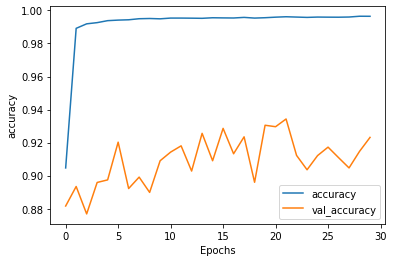

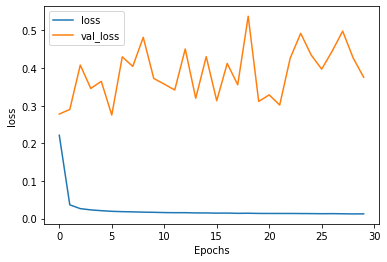

In [13]:
import matplotlib.pyplot as plt


def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.plot(history.history['val_'+string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.legend([string, 'val_'+string])
  plt.show()
  
plot_graphs(history, "accuracy")
plot_graphs(history, "loss")